In [7]:
import numpy as np
import seaborn as sns
import torch
from torch.utils.data import TensorDataset, DataLoader

import res.process_data.process_output as out
from res.wgan.training import Training
from res.wgan.functions import get_noise
from res.process_data.dataset import tensor_dataset
from res.wgan.training import Training
from res.wgan.critic import Critic
import res.process_data.process_output as out
from res.wgan.genetator import Generator
import res.process_data.test_nn as test_nn

# write random datasets

<AxesSubplot:ylabel='Count'>

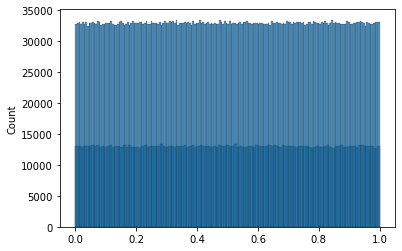

In [2]:
# for scalar
scalar_random = np.random.rand(100000, 15, 1)
sns.histplot(data=((scalar_random).reshape(15 * 100000)))
# for one hot vector
one_hot_random = np.random.rand(100000, 15, 4)
sns.histplot(data=((one_hot_random).reshape(15 * 100000 * 4)))

In [3]:
n_epochs = 20
z_dim = 8
display_step = 50
batch_size = 128
lr = 0.0003
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
crit_repeats = 5
device = 'cpu'
shuffle = True
num_worker = 4
pin_memory = True

In [4]:
input_tensor = torch.Tensor(scalar_random)
dataset = tensor_dataset(input_tensor, 15, 1)
dataloader = DataLoader(dataset= dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

In [5]:
gen = Generator(z_dim, im_dim=15, hidden_dim=16).to(device)
crit = Critic(im_dim=15, hidden_dim=16).to(device)
gen_opt = torch.optim.Adam(gen.parameters(), lr=lr, betas=(beta_1, beta_2))
crit_opt = torch.optim.Adam(crit.parameters(), lr=lr, betas=(beta_1, beta_2))

<AxesSubplot:ylabel='Count'>

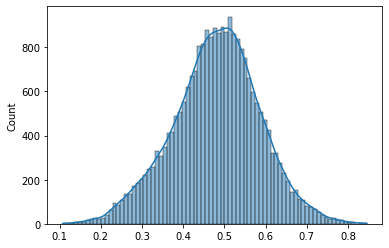

In [8]:
# check the output of generator before training
before_training = test_nn.check_output(gen, 100, 16, 8, 15)
sns.histplot(data=before_training, kde=True)

Train model

In [9]:
Training(n_epochs, dataloader, device, crit_repeats, gen, gen_opt,
             crit, crit_opt, z_dim, c_lambda, display_step)

  0%|          | 0/782 [00:00<?, ?it/s]

Step 50: Generator loss: -0.8553186058998108, critic loss: 6.371762336730956
Step 100: Generator loss: -1.0786105585098267, critic loss: 6.995898038864134
Step 150: Generator loss: -1.9935903477668762, critic loss: 6.4346105613708495
Step 200: Generator loss: -3.9499526166915895, critic loss: 5.787077911376953
Step 250: Generator loss: -5.005586366653443, critic loss: 5.805804140090943
Step 300: Generator loss: -5.127828493118286, critic loss: 5.885743923187256
Step 350: Generator loss: -5.186797704696655, critic loss: 5.99878529548645
Step 400: Generator loss: -5.321716241836548, critic loss: 5.994237533569335
Step 450: Generator loss: -5.388534307479858, critic loss: 6.016683280944825
Step 500: Generator loss: -5.430181827545166, critic loss: 6.0184914531707765
Step 550: Generator loss: -5.452038993835449, critic loss: 6.051867507934569
Step 600: Generator loss: -5.483541374206543, critic loss: 6.041000291824343
Step 650: Generator loss: -5.517578477859497, critic loss: 6.05329126167

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/782 [00:00<?, ?it/s]

In [10]:
# save the model
torch.save({'gen_state_dict': gen.state_dict()}, 'wgan_gen_scalar_random.pth.tar')
torch.save({'crit_state_dict': crit.state_dict()}, 'wgan_crit_scalar_random.pth.tar')

In [11]:
# load the model
# create a new model, same structure as the previous one
gen_model = Generator(z_dim, im_dim=15, hidden_dim=16).to(device)
crit_model = Critic(im_dim=15, hidden_dim=16).to(device)
# get the state from stored file
gen_checkpoint = torch.load('wgan_gen_scalar_random.pth.tar')
crit_chechpoint = torch.load('wgan_crit_scalar_random.pth.tar')
# load the state to the new model
gen_model.load_state_dict(gen_checkpoint['gen_state_dict'])
crit_model.load_state_dict(crit_chechpoint['crit_state_dict'])

<All keys matched successfully>

<AxesSubplot:ylabel='Count'>

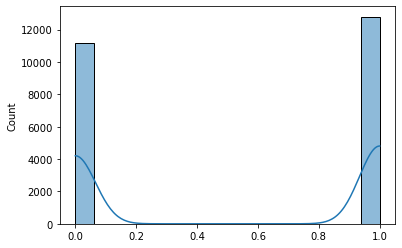

In [12]:
# check the output
after_training = test_nn.check_output(gen_model, 100, 16, 8, 15)
sns.histplot(data=after_training, kde=True)
